# **Self Organizing Maps in Knowledge Retention Detection**



In [118]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modules.minisom import MiniSom
from pylab import bone, pcolor, colorbar
from sklearn.preprocessing import MinMaxScaler

In [119]:
# create a dataset of perfect specialists for each group of questions
def create_specialists_data(N:int, Nq:int=4, 
                            low: int=1, high:int=5,
                            blocks_specialists: int=100):
    """
    creates a dataset that represents
    the ideal answers of specialists in each area
    of knowledge.

    :param N: number of group of knowledges
    :type N: int
    :param Nq: number of questions in each group of knowledge, defaults to 4
    :type Nq: int, optional
    :param low: lowest grade possible, defaults to 1
    :type low: int, optional
    :param high: highest grade possible, defaults to 5
    :type high: int, optional
    :param blocks_specialists: numbers of blocks of specialists to be created, defaults to 100
    :type blocks_specialists: int, optional
    """

    # total number of questions
    Nt = N * Nq

    # standard row
    std_row = np.repeat(low, repeats=Nt)

    # each specialist has the maximum grade in each 
    # area and the lowest in the other areas
    aux = []
    for _ in range(blocks_specialists):
        for i in range(0, Nt, Nq):
            row = std_row.copy()
            row[i:i+Nq] = high

            # append to data
            aux.append(row)

    # create dataframe
    cols = [f'Q{i+1}' for i in range(Nt)]
    data = pd.DataFrame(aux, columns=cols)

    return data

In [120]:
# create data of specialists
Nspc = 5
data_perfect = create_specialists_data(Nspc, Nq=4)

In [121]:
# feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_perfect)
x_sc = scaler.transform(data_perfect)

In [122]:
# create the object and fit the mode
N = int(np.sqrt(5 * np.sqrt(x_sc.shape[0]))) 
print(f'Lado do Mapa: {N}')

Lado do Mapa: 10


In [123]:
# train the model - the size of the map was chosen based 
# on the recommendations of the creators of the packages
som = MiniSom(x=N, y=N, input_len=x_sc.shape[1], sigma=N-1, learning_rate=0.5)
som.random_weights_init(x_sc)
som.train_random(x_sc, num_iteration=200)

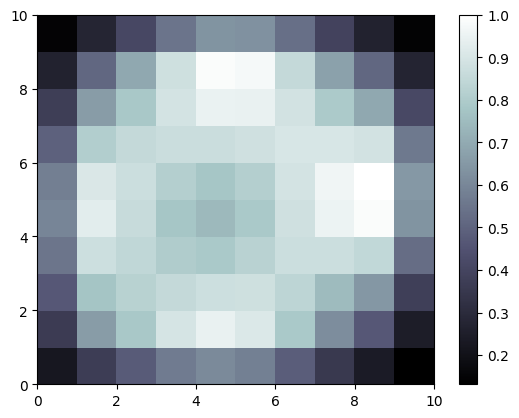

In [124]:
# visualize the results
bone()
pcolor(som.distance_map().T)
colorbar()

In [125]:
# get winning neurons for each sample
coord_list = []
for i in range(x_sc.shape[0]):

    # get winning neuron coordinates
    coord = som.winner(x=x_sc[i])

    # get coordinates of each sample
    coord_list.append(coord)

# append coordinates column to dataset
data_perfect['coord'] = coord_list

In [126]:
data_perfect.head(Nspc)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,coord
0,5,5,5,5,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,"(0, 0)"
1,1,1,1,1,5,5,5,5,1,1,...,1,1,1,1,1,1,1,1,1,"(4, 4)"
2,1,1,1,1,1,1,1,1,5,5,...,5,1,1,1,1,1,1,1,1,"(0, 9)"
3,1,1,1,1,1,1,1,1,1,1,...,1,5,5,5,5,1,1,1,1,"(9, 9)"
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,5,5,5,5,"(9, 0)"
